In [1]:
from tqdm import tqdm 
import numpy as np

import statistics as stats

from sempler.generators import dag_avg_deg
from sempler import LGANM

import ges
from scores import HuberScore
from our_utils import *

import matplotlib.pyplot as plt 

from noisy_causal_discovery import *

## Empty Graph Experiment

In [2]:
# setting experimental parameters
trials = 100
avg_deg = 1
err_lvl = 0.05

# setting dimension and sample increments
d_inc = 5
n_inc = 100

#initializing results matrix
results_rand = np.zeros((4, 5))

In [3]:
for d_iter in range(results_rand.shape[0]):
    for n_iter in range(results_rand.shape[1]):

        if results_rand[d_iter, n_iter] != 0:
            continue

        d, n = d_inc * (d_iter+1), n_inc * (n_iter+1)

        for trial in tqdm(range(trials)):
            G = np.zeros((d,d))
            data = LGANM(G, (0,0), (1,1)).sample(n=n)

            cpdag_estimate, _ = noisy_fit(HuberScore(data)) # change to HuberScore(data, delta=0.5) 
                                                            # to see behavior of classical GES with
                                                            # the Huber score used in the paper.

            results_rand[d_iter, n_iter] += (1-is_valid(data, cpdag_estimate, err_lvl, G))

        results_rand[d_iter, n_iter] /= trials
        print("d, n=", d, n, ", metrics=", results_rand[d_iter, n_iter])

100%|██████████| 100/100 [00:07<00:00, 12.61it/s]


d, n= 5 100 , metrics= 0.14


100%|██████████| 100/100 [00:07<00:00, 12.74it/s]


d, n= 5 200 , metrics= 0.07


100%|██████████| 100/100 [00:07<00:00, 12.97it/s]


d, n= 5 300 , metrics= 0.11


100%|██████████| 100/100 [00:08<00:00, 11.23it/s]


d, n= 5 400 , metrics= 0.08


100%|██████████| 100/100 [00:08<00:00, 12.09it/s]


d, n= 5 500 , metrics= 0.1


100%|██████████| 100/100 [01:30<00:00,  1.10it/s]


d, n= 10 100 , metrics= 0.16


100%|██████████| 100/100 [01:40<00:00,  1.01s/it]


d, n= 10 200 , metrics= 0.13


100%|██████████| 100/100 [01:58<00:00,  1.19s/it]


d, n= 10 300 , metrics= 0.17


100%|██████████| 100/100 [01:41<00:00,  1.01s/it]


d, n= 10 400 , metrics= 0.09


100%|██████████| 100/100 [27:16<00:00, 16.37s/it]  


d, n= 10 500 , metrics= 0.09


100%|██████████| 100/100 [43:27<00:00, 26.07s/it]  


d, n= 15 100 , metrics= 0.3


100%|██████████| 100/100 [06:12<00:00,  3.72s/it]


d, n= 15 200 , metrics= 0.21


100%|██████████| 100/100 [05:55<00:00,  3.56s/it]


d, n= 15 300 , metrics= 0.17


100%|██████████| 100/100 [05:30<00:00,  3.30s/it]


d, n= 15 400 , metrics= 0.18


100%|██████████| 100/100 [05:13<00:00,  3.13s/it]


d, n= 15 500 , metrics= 0.17


100%|██████████| 100/100 [18:03<00:00, 10.84s/it]


d, n= 20 100 , metrics= 0.29


100%|██████████| 100/100 [16:20<00:00,  9.80s/it]


d, n= 20 200 , metrics= 0.17


100%|██████████| 100/100 [22:56<00:00, 13.76s/it]  


d, n= 20 300 , metrics= 0.23


100%|██████████| 100/100 [1:42:42<00:00, 61.63s/it]  


d, n= 20 400 , metrics= 0.18


100%|██████████| 100/100 [14:52<00:00,  8.92s/it]

d, n= 20 500 , metrics= 0.13


[NOTE]: To get the plots for classical GES with the Huber Score simply add delta=0.5 in the HuberScore specification above, as per the comment. (by default delta is set to infinity which is equivalent to the BIC score).

In [4]:
d_list = (np.arange(4)+1)*d_inc
n_list = (np.arange(5)+1)*n_inc

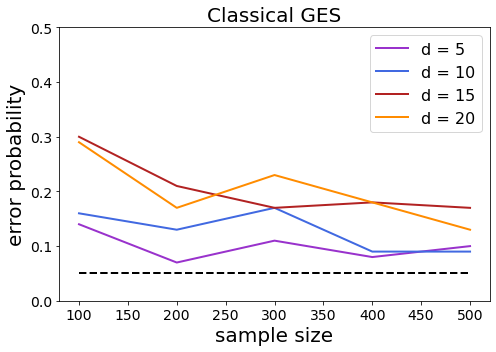

In [6]:
plt.figure(figsize=(7, 5))
colors=['darkorchid', 'royalblue', 'firebrick', 'darkorange', 'forestgreen']
for d_iter in range(4):
    d = d_inc * (d_iter+1)
    plt.plot(n_list, results_rand[d_iter], color=colors[d_iter], label="d = " + str(d), linewidth=2)
plt.plot(n_list, err_lvl*np.ones(5), '--', color="black", linewidth=2)
plt.xlabel("sample size", fontsize=20)
plt.xticks(fontsize=14)
plt.ylabel("error probability", fontsize=20)
plt.yticks(fontsize=14)
plt.legend(fontsize=16)
plt.title("Classical GES", fontsize=20)
plt.ylim((0.0, 0.5))
plt.tight_layout()